In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# code_path = Path(__file__)
code_path = Path(r'C:\Users\tianc\OneDrive\Documents\SIG\DISES\code\MPI')
datafd_path = code_path.parent.parent / 'data' / 'MPI' 
outfd_path = code_path.parent.parent / 'output'

### cluster-level MPI based on Cambodia DHS 2010 with SE, CI and missingness info

In [47]:
survey = 'khm_dhs10'
spatial_res = 'clust'
df = pd.read_csv(outfd_path / 'data' / f'mpi_{survey}_{spatial_res}_CI_mis.csv')

In [48]:
df.describe()  # missing SE & CI？

,clust_no,mpi,mpi_SE,mpi_lo95CI,mpi_up95CI,tot_samp_ppl,pct_samp_ppl_mis
count,611.000000,611.000000,531.000000,531.000000,531.000000,611.000000,611.000000
mean,306.000000,0.215848,0.064240,0.107748,0.388986,61.759411,2.200229
std,176.524786,0.163557,0.018881,0.142238,0.169124,10.520833,4.771342
min,1.000000,0.000000,0.005157,-0.084281,0.015972,30.000000,0.000000
25%,153.500000,0.073136,0.053380,-0.008315,0.266366,55.000000,0.000000
50%,306.000000,0.207071,0.064997,0.071643,0.392125,61.000000,0.000000
75%,458.500000,0.329584,0.075922,0.189323,0.514100,68.000000,0.000000
max,611.000000,0.754237,0.121375,0.641734,0.897640,112.000000,28.169012


In [49]:
df[df.mpi != 0].describe()  # SE/CI missing b/c 0 MPI 

,clust_no,mpi,mpi_SE,mpi_lo95CI,mpi_up95CI,tot_samp_ppl,pct_samp_ppl_mis
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000
mean,304.075330,0.248367,0.064240,0.107748,0.388986,62.318267,2.257008
std,181.472421,0.150654,0.018881,0.142238,0.169124,10.554192,4.876973
min,1.000000,0.004831,0.005157,-0.084281,0.015972,30.000000,0.000000
25%,143.500000,0.131961,0.053380,-0.008315,0.266366,56.000000,0.000000
50%,294.000000,0.227577,0.064997,0.071643,0.392125,62.000000,0.000000
75%,461.500000,0.351323,0.075922,0.189323,0.514100,68.000000,0.000000
max,611.000000,0.754237,0.121375,0.641734,0.897640,112.000000,28.169012


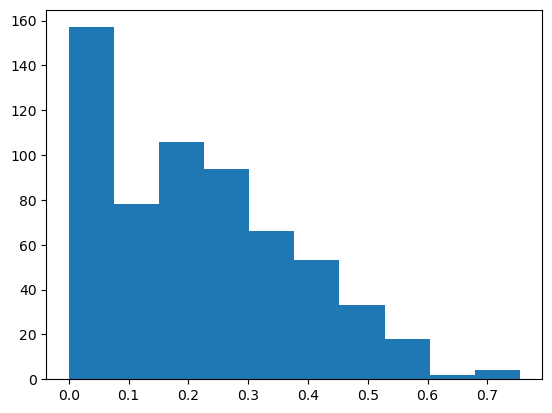

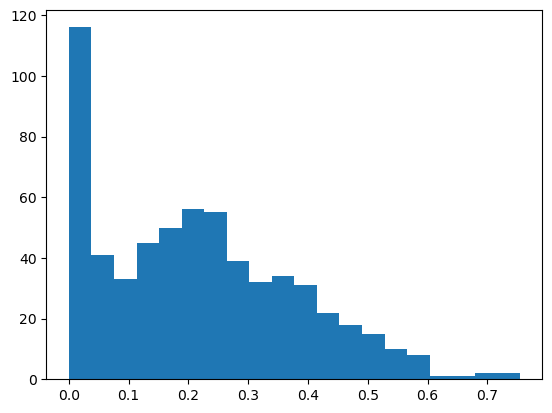

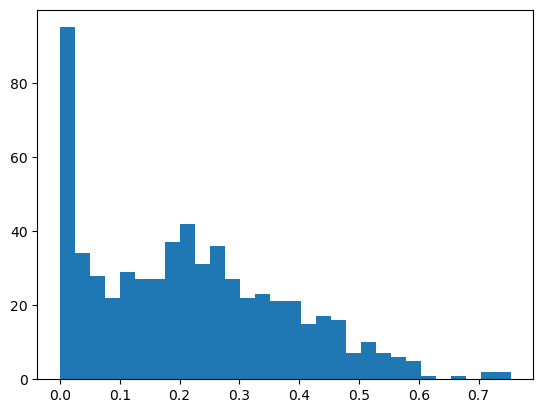

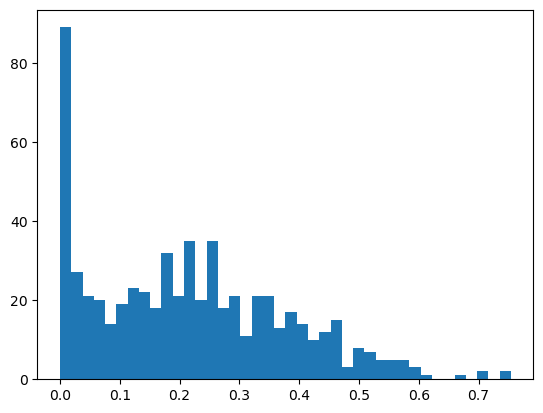

In [26]:
for n_bin in [10, 20, 30, 40]:
    plt.figure()
    plt.hist(df.mpi, bins=n_bin);

#### 0 MPI

In [25]:
mpi_df = df

In [27]:
mpi_df.loc[mpi_df.mpi == 0, :]  # 80 clusters have 0 MPI

,clust_no,mpi,mpi_SE,mpi_lo95CI,mpi_up95CI,tot_samp_ppl,pct_samp_ppl_mis
15,16,0.0,NaN,NaN,NaN,49,6.122446
28,29,0.0,NaN,NaN,NaN,78,0.000000
40,41,0.0,NaN,NaN,NaN,42,7.142860
68,69,0.0,NaN,NaN,NaN,41,4.878050
69,70,0.0,NaN,NaN,NaN,56,17.857140
...,...,...,...,...,...,...,...
536,537,0.0,NaN,NaN,NaN,41,0.000000
563,564,0.0,NaN,NaN,NaN,60,10.000002
565,566,0.0,NaN,NaN,NaN,43,0.000000
566,567,0.0,NaN,NaN,NaN,71,0.000000


In [29]:
mpi0_clusters = mpi_df.loc[mpi_df.mpi == 0, 'clust_no']
mpi0_clusters

15      16
28      29
40      41
68      69
69      70
      ... 
536    537
563    564
565    566
566    567
602    603
Name: clust_no, Length: 80, dtype: int64

##### inspect all clusters w/ 0 MPI

In [42]:
# check if MPI=0 simply b/c cluster has no poor ppl.
# print cluster # if not
tocheck_clusters = []
for clust_no in mpi0_clusters:
    clust_mpi_df = pd.read_stata(
        datafd_path / survey / 
        f'{survey}_mpi_{spatial_res}{clust_no}.dta')
    mpi_k20 = clust_mpi_df.MPI_1_20.unique()
    assert len(mpi_k20) == 1
    mpi_k20 = mpi_k20[0]
    if mpi_k20 > 0:  # MPI=0 b/c cluster has no poor ppl.
        pass
    else:  # TO CHECK: clusters have 0 mpi_k20
        # all ppl. have score < 20?
        print(f'{clust_no}: {mpi_k20}')
        tocheck_clusters.append(clust_no)

69: 0.0
138: 0.0
224: 0.0
249: 0.0
271: 0.0
312: 0.0
314: 0.0
315: 0.0
317: 0.0
332: 0.0
463: 0.0
485: 0.0
537: 0.0


In [43]:
# check the printed clusters that have 0 mpi_k20:
# confirm that all/some ppl. used to calc. MPI (1st 3 columns), 
# MPI=0 b/c none is poor (last column has max poverty score < 0.2)
for clust_no in tocheck_clusters:
    clust_mpi_df = pd.read_stata(
        datafd_path / survey / 
        f'{survey}_mpi_{spatial_res}{clust_no}.dta')
    print(clust_no)
    print(clust_mpi_df.shape[0])  # total no. of ppl.
    display(clust_mpi_df[['sample_1',  # in subsample (used)
                          'per_sample_weighted_1',  # % no missing
                          'per_sample_1',  # % no missing
                          'c_vector_1']].describe())  # score
    print()


69
41


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,41.000000,4.100000e+01,4.100000e+01,39.000000
mean,0.951219,9.512191e-01,9.512191e-01,0.022792
std,0.218085,3.620706e-07,3.620706e-07,0.052113
min,0.000000,9.512195e-01,9.512195e-01,0.000000
25%,1.000000,9.512195e-01,9.512195e-01,0.000000
50%,1.000000,9.512195e-01,9.512195e-01,0.000000
75%,1.000000,9.512195e-01,9.512195e-01,0.000000
max,1.000000,9.512195e-01,9.512195e-01,0.166667



138
79


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,79.000000,7.900000e+01,7.900000e+01,76.000000
mean,0.962025,9.620255e-01,9.620255e-01,0.037281
std,0.192356,1.799565e-07,1.799565e-07,0.066288
min,0.000000,9.620253e-01,9.620253e-01,0.000000
25%,1.000000,9.620253e-01,9.620253e-01,0.000000
50%,1.000000,9.620253e-01,9.620253e-01,0.000000
75%,1.000000,9.620253e-01,9.620253e-01,0.055556
max,1.000000,9.620253e-01,9.620253e-01,0.166667



224
48


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,48.0,48.0,48.0,48.000000
mean,1.0,1.0,1.0,0.065972
std,0.0,0.0,0.0,0.050809
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.055556
50%,1.0,1.0,1.0,0.055556
75%,1.0,1.0,1.0,0.055556
max,1.0,1.0,1.0,0.166667



249
59


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,59.0,59.0,59.0,59.000000
mean,1.0,1.0,1.0,0.057439
std,0.0,0.0,0.0,0.051547
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.055556
75%,1.0,1.0,1.0,0.055556
max,1.0,1.0,1.0,0.166667



271
56


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,56.0,56.0,56.0,56.000000
mean,1.0,1.0,1.0,0.033730
std,0.0,0.0,0.0,0.052629
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.000000
75%,1.0,1.0,1.0,0.055556
max,1.0,1.0,1.0,0.166667



312
53


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,53.0,53.0,53.0,53.000000
mean,1.0,1.0,1.0,0.039832
std,0.0,0.0,0.0,0.067496
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.000000
75%,1.0,1.0,1.0,0.055556
max,1.0,1.0,1.0,0.166667



314
63


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,63.000000,6.300000e+01,6.300000e+01,59.000000
mean,0.936508,9.365081e-01,9.365081e-01,0.075330
std,0.245804,1.802502e-07,1.802502e-07,0.076343
min,0.000000,9.365079e-01,9.365079e-01,0.000000
25%,1.000000,9.365079e-01,9.365079e-01,0.000000
50%,1.000000,9.365079e-01,9.365079e-01,0.055556
75%,1.000000,9.365079e-01,9.365079e-01,0.166667
max,1.000000,9.365079e-01,9.365079e-01,0.166667



315
47


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,47.0,47.0,47.0,47.000000
mean,1.0,1.0,1.0,0.089835
std,0.0,0.0,0.0,0.080718
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.166667
75%,1.0,1.0,1.0,0.166667
max,1.0,1.0,1.0,0.166667



317
51


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,51.0,51.0,51.0,51.000000
mean,1.0,1.0,1.0,0.068627
std,0.0,0.0,0.0,0.078243
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.000000
75%,1.0,1.0,1.0,0.166667
max,1.0,1.0,1.0,0.166667



332
49


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,49.000000,4.900000e+01,4.900000e+01,45.000000
mean,0.918367,9.183668e-01,9.183668e-01,0.046914
std,0.276642,5.420009e-07,5.420009e-07,0.062625
min,0.000000,9.183673e-01,9.183673e-01,0.000000
25%,1.000000,9.183673e-01,9.183673e-01,0.000000
50%,1.000000,9.183673e-01,9.183673e-01,0.000000
75%,1.000000,9.183673e-01,9.183673e-01,0.055556
max,1.000000,9.183673e-01,9.183673e-01,0.166667



463
59


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,59.0,59.0,59.0,59.000000
mean,1.0,1.0,1.0,0.099812
std,0.0,0.0,0.0,0.057235
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.055556
50%,1.0,1.0,1.0,0.055556
75%,1.0,1.0,1.0,0.166667
max,1.0,1.0,1.0,0.166667



485
62


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,62.0,62.0,62.0,62.000000
mean,1.0,1.0,1.0,0.026882
std,0.0,0.0,0.0,0.056675
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.000000
75%,1.0,1.0,1.0,0.000000
max,1.0,1.0,1.0,0.166667



537
41


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,41.0,41.0,41.0,41.000000
mean,1.0,1.0,1.0,0.047425
std,0.0,0.0,0.0,0.056329
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.055556
75%,1.0,1.0,1.0,0.055556
max,1.0,1.0,1.0,0.166667


##### missingness

In [54]:
# confirm that per_sample_1 is just percent rows with missing values in 
# c_censured_vector_1_33
# yes for all clusters
tocheck_clusters = []

for clust_no in range(1, 611+1):
    df = pd.read_stata(
        datafd_path / survey / 
        f'{survey}_mpi_{spatial_res}{clust_no}.dta')
    assert df.subsample.unique() == ["men's survey"]  # all in men's survey
    assert len(df.per_sample_1.unique()) == 1
    assert all(df.per_sample_weighted_1 == df.per_sample_1)
    perc_nonmiss = df.per_sample_1.unique()[0]
    perc_miss = df.c_censured_vector_1_33.isna().mean()
    try:
        assert abs(perc_miss + perc_nonmiss - 1) < 1e-4
    except:
        tocheck_clusters.append(clust_no)
    print(perc_miss)
    # display(clust_mpi_df.head(2))

assert len(tocheck_clusters) == 0

0.0
0.17857142857142858
0.19298245614035087
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.047058823529411764
0.0
0.08823529411764706
0.24528301886792453
0.0
0.061224489795918366
0.0
0.0
0.09259259259259259
0.0
0.0
0.0
0.06349206349206349
0.0
0.0
0.13846153846153847
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.14
0.125
0.0
0.0
0.0547945205479452
0.16129032258064516
0.0
0.07142857142857142
0.05172413793103448
0.0
0.0
0.07246376811594203
0.06060606060606061
0.0
0.0
0.125
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1076923076923077
0.0
0.0
0.0
0.0
0.06896551724137931
0.0
0.04878048780487805
0.17857142857142858
0.11666666666666667
0.0
0.0684931506849315
0.1
0.05084745762711865
0.08
0.0
0.0
0.25
0.0
0.06666666666666667
0.0
0.0
0.0
0.04081632653061224
0.0
0.20833333333333334
0.2631578947368421
0.0
0.19298245614035087
0.0
0.18309859154929578
0.08108108108108109
0.05660377358490566
0.1774193548387097
0.0
0.0
0.0
0.0
0.05970149253731343
0.1
0.0
0.045454545454545456
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

#### explore missingness, SE & CI

In [ ]:
survey = 'khm_dhs10'
spatial_res = 'clust'
df = pd.read_csv(outfd_path / 'data' / f'mpi_{survey}_{spatial_res}_CI_mis.csv')

##### explore missingness

(array([  5.,  31., 104., 197., 160.,  87.,  16.,   6.,   4.,   1.]),
 array([ 30. ,  38.2,  46.4,  54.6,  62.8,  71. ,  79.2,  87.4,  95.6,
        103.8, 112. ]),
 <BarContainer object of 10 artists>)

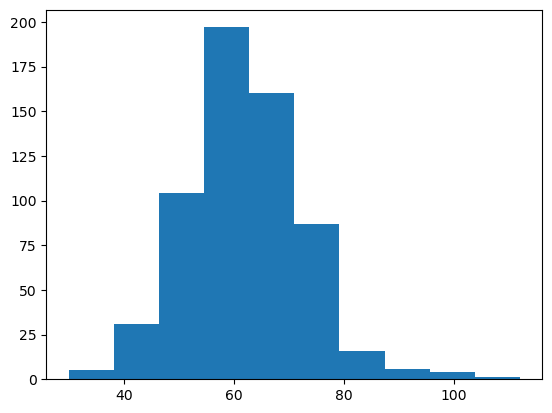

In [5]:
plt.hist(df.tot_samp_ppl)  # number of people sampled in each cluster

In [6]:
df.tot_samp_ppl.min()  # at least these # of ppl. sampled in a cluster

30

(array([474.,  26.,  46.,  23.,  19.,   6.,  10.,   3.,   2.,   2.]),
 array([ 0.        ,  2.81690121,  5.63380241,  8.45070362, 11.26760483,
        14.08450603, 16.90140724, 19.71830845, 22.53520966, 25.35211086,
        28.16901207]),
 <BarContainer object of 10 artists>)

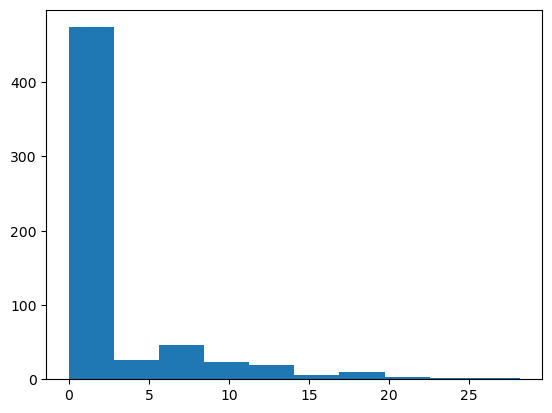

In [9]:
plt.hist(df.pct_samp_ppl_mis)  # percent sampled people with missing data
# not used in MPI / CI calculation

In [10]:
df.pct_samp_ppl_mis.max()  # as much as 30% missing

28.16901206970215

30.0


(array([ 10.,  41., 121., 201., 144.,  69.,  17.,   4.,   3.,   1.]),
 array([ 30. ,  38.2,  46.4,  54.6,  62.8,  71. ,  79.2,  87.4,  95.6,
        103.8, 112. ]),
 <BarContainer object of 10 artists>)

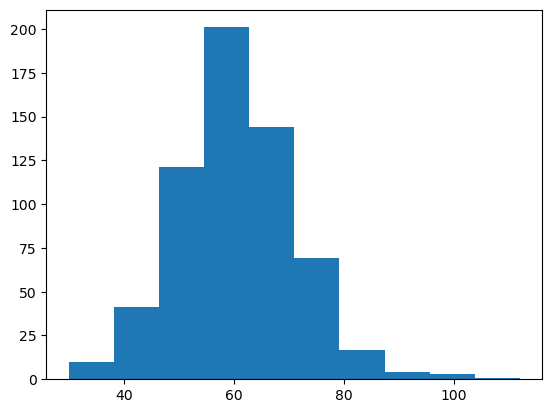

In [11]:
# number of people with complete info, thus used to calculate MPI & CI
n_ppl_no_mis_s = df.tot_samp_ppl * (100 - df.pct_samp_ppl_mis) / 100
print(n_ppl_no_mis_s.min())  # at least these # of ppl. w/ complete info
plt.hist(n_ppl_no_mis_s)

##### explore SE & CI

In [19]:
CV_s = df.mpi_SE / df.mpi  # coef. of variation

In [20]:
np.sort(CV_s)

array([0.0452928 , 0.04672709, 0.05233779, 0.0549133 , 0.05735278,
       0.05753938, 0.05908906, 0.0613678 , 0.06360804, 0.06419811,
       0.06938873, 0.07040524, 0.07423887, 0.07663617, 0.07775024,
       0.07786728, 0.07856114, 0.07915068, 0.08069975, 0.08533106,
       0.09256234, 0.09641403, 0.09736898, 0.10041786, 0.10217626,
       0.10321779, 0.10323806, 0.10728927, 0.10786474, 0.11073697,
       0.11081882, 0.11162591, 0.1133709 , 0.11473592, 0.11813174,
       0.11942557, 0.12203833, 0.12358578, 0.1237205 , 0.12396712,
       0.12557506, 0.12733969, 0.12785289, 0.12797189, 0.1283789 ,
       0.12935235, 0.13026689, 0.13328828, 0.13417082, 0.13424009,
       0.13597999, 0.13633109, 0.13841588, 0.13920976, 0.13945837,
       0.13990614, 0.14093656, 0.14158158, 0.14170731, 0.14179501,
       0.14317811, 0.14338873, 0.14402272, 0.1440312 , 0.14627188,
       0.14694869, 0.14808752, 0.14812315, 0.14847258, 0.14852697,
       0.1515269 , 0.1535714 , 0.15382248, 0.15572119, 0.15592

(array([ 70., 116., 125.,  79.,  36.,  31.,  22.,   6.,  12.,  34.]),
 array([0.0452928 , 0.14985629, 0.25441978, 0.35898327, 0.46354677,
        0.56811026, 0.67267375, 0.77723724, 0.88180073, 0.98636422,
        1.09092771]),
 <BarContainer object of 10 artists>)

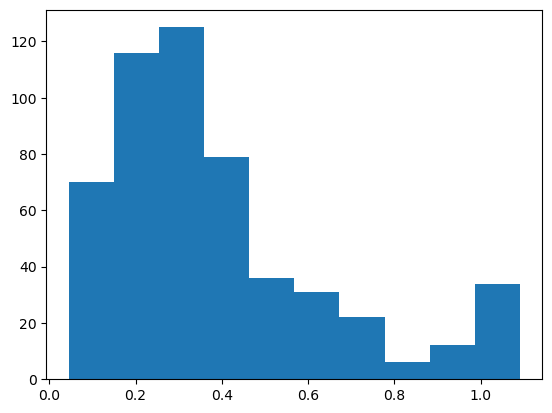

In [21]:
plt.hist(CV_s)

(0.0, 612.0)

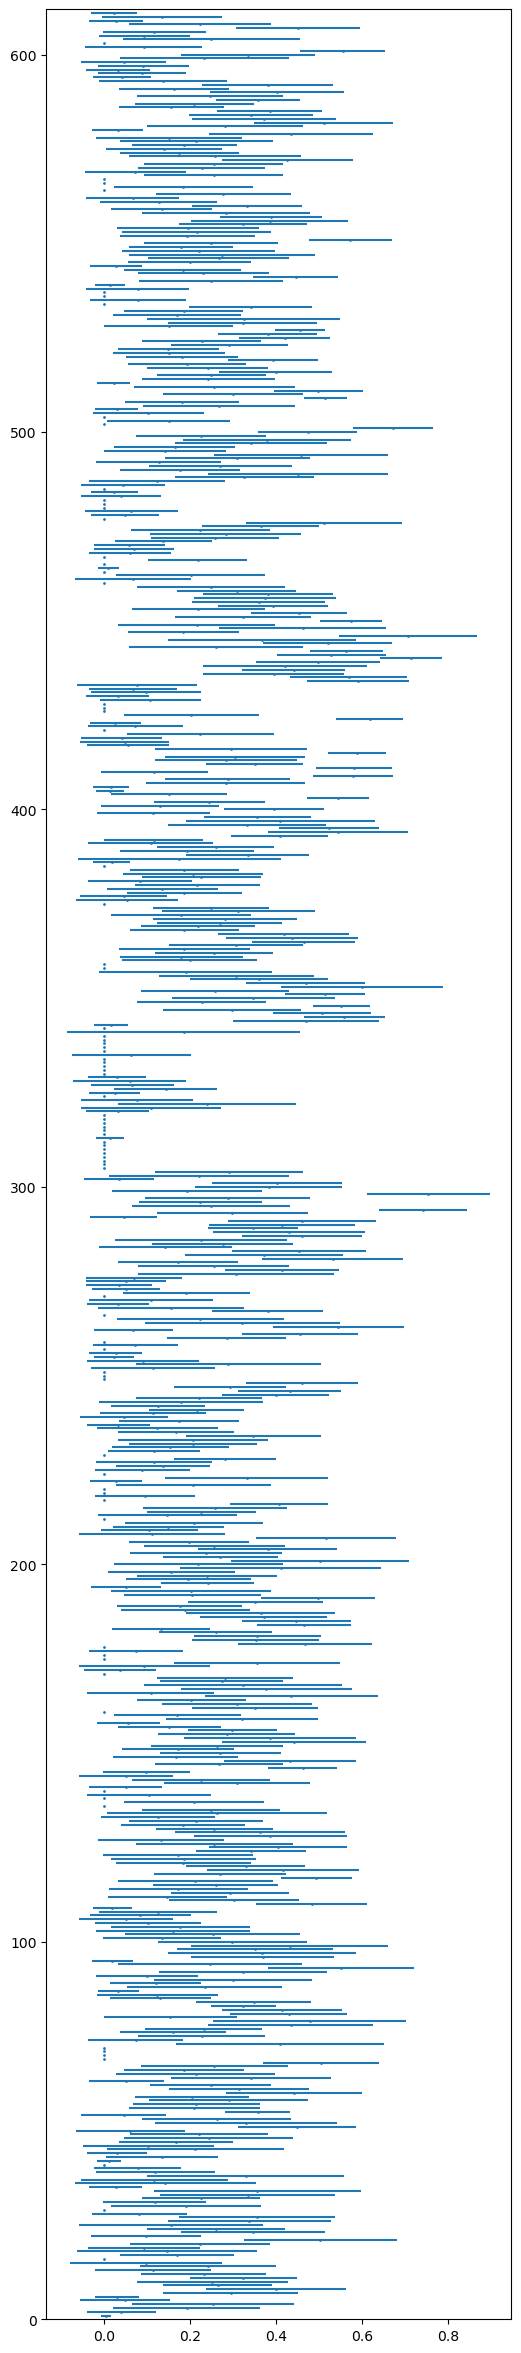

In [22]:
plt.figure(figsize=(6,30))
n_clust = df.shape[0]
plt.scatter(data=df[:n_clust], x='mpi', y='clust_no', s=1)
plt.hlines(data=df[:n_clust],
           y='clust_no', xmin='mpi_lo95CI', xmax='mpi_up95CI')
plt.ylim(0, n_clust+1)

### cluster-level MPI based on Cambodia DHS 2014 with SE, CI and missingness info

In [5]:
spatial_res = 'clust'
df = pd.read_csv(outfd_path / 'data' / f'mpi_khm_dhs14_{spatial_res}_CI_mis.csv')

#### explore missingness

(array([  4.,  22.,  60., 116., 133., 140.,  79.,  32.,  16.,   9.]),
 array([ 44. ,  51.2,  58.4,  65.6,  72.8,  80. ,  87.2,  94.4, 101.6,
        108.8, 116. ]),
 <BarContainer object of 10 artists>)

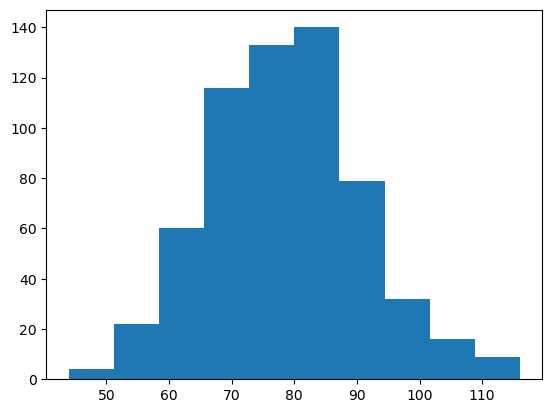

In [7]:
plt.hist(df.tot_samp_ppl)  # number of people sampled in each cluster

In [8]:
df.tot_samp_ppl.min()  # at least 44

44

(array([440.,  61.,  60.,  26.,  14.,   6.,   3.,   0.,   0.,   1.]),
 array([ 0.        ,  3.10344815,  6.20689631,  9.31034446, 12.41379261,
        15.51724076, 18.62068892, 21.72413707, 24.82758522, 27.93103337,
        31.03448153]),
 <BarContainer object of 10 artists>)

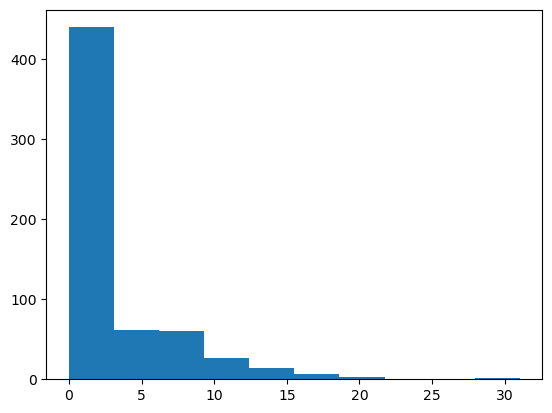

In [9]:
plt.hist(df.ppt_samp_ppl_mis)  # percent sampled people with missing data
# not used in MPI / CI calculation

In [10]:
df.pct_samp_ppl_mis.max()  # as much as 30% missing

31.034481525421143

44.0


(array([  9.,  21.,  74., 120., 122., 129.,  72.,  37.,  21.,   6.]),
 array([ 44.,  51.,  58.,  65.,  72.,  79.,  86.,  93., 100., 107., 114.]),
 <BarContainer object of 10 artists>)

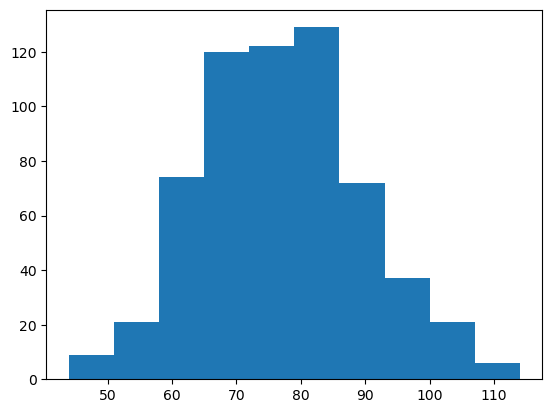

In [13]:
# number of people with complete info, thus used to calculate MPI & CI
n_ppl_no_mis_s = df.tot_samp_ppl * (100 - df.ppt_samp_ppl_mis) / 100
print(n_ppl_no_mis_s.min())  # at least 44
plt.hist(n_ppl_no_mis_s)

#### explore SE & CI

In [22]:
CV_s = df.mpi_SE / df.mpi  # coef. of variation

In [23]:
np.sort(CV_s)

array([0.05020808, 0.06361991, 0.06448875, 0.08226161, 0.08492527,
       0.0875925 , 0.101562  , 0.10851287, 0.10921308, 0.11478729,
       0.11551205, 0.11602241, 0.11723982, 0.11729779, 0.11757745,
       0.1186575 , 0.11995696, 0.12540495, 0.12628946, 0.12663086,
       0.12674299, 0.12690005, 0.13171603, 0.1322521 , 0.13255657,
       0.1335332 , 0.13402962, 0.13420948, 0.13495533, 0.13509071,
       0.13559609, 0.13728592, 0.13846054, 0.1389101 , 0.13905157,
       0.14023076, 0.14044954, 0.14103899, 0.14313372, 0.14330686,
       0.14406632, 0.14476012, 0.14809263, 0.14922679, 0.15003661,
       0.15049431, 0.15183321, 0.15233812, 0.15463621, 0.15495031,
       0.15720057, 0.1573923 , 0.16023378, 0.16056965, 0.16345517,
       0.16350871, 0.16423004, 0.16496551, 0.16625604, 0.17165062,
       0.17315105, 0.17453074, 0.1759266 , 0.17735148, 0.17868979,
       0.17882914, 0.17933333, 0.17939624, 0.18247538, 0.18286012,
       0.18291457, 0.18404288, 0.18432504, 0.18437324, 0.18444

(array([ 46., 103., 108.,  74.,  45.,  35.,  38.,  11.,   8.,  57.]),
 array([0.05020808, 0.15125029, 0.2522925 , 0.3533347 , 0.45437691,
        0.55541912, 0.65646133, 0.75750354, 0.85854574, 0.95958795,
        1.06063016]),
 <BarContainer object of 10 artists>)

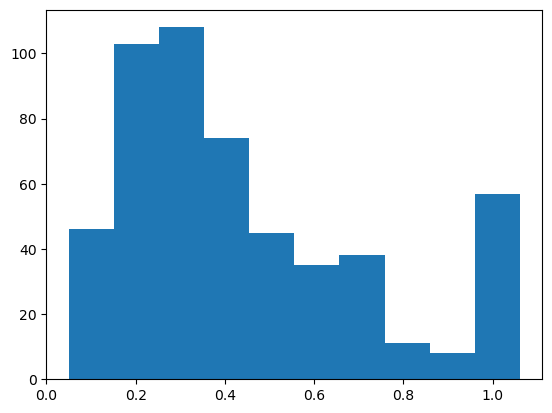

In [15]:
plt.hist(CV_s)

(0.0, 612.0)

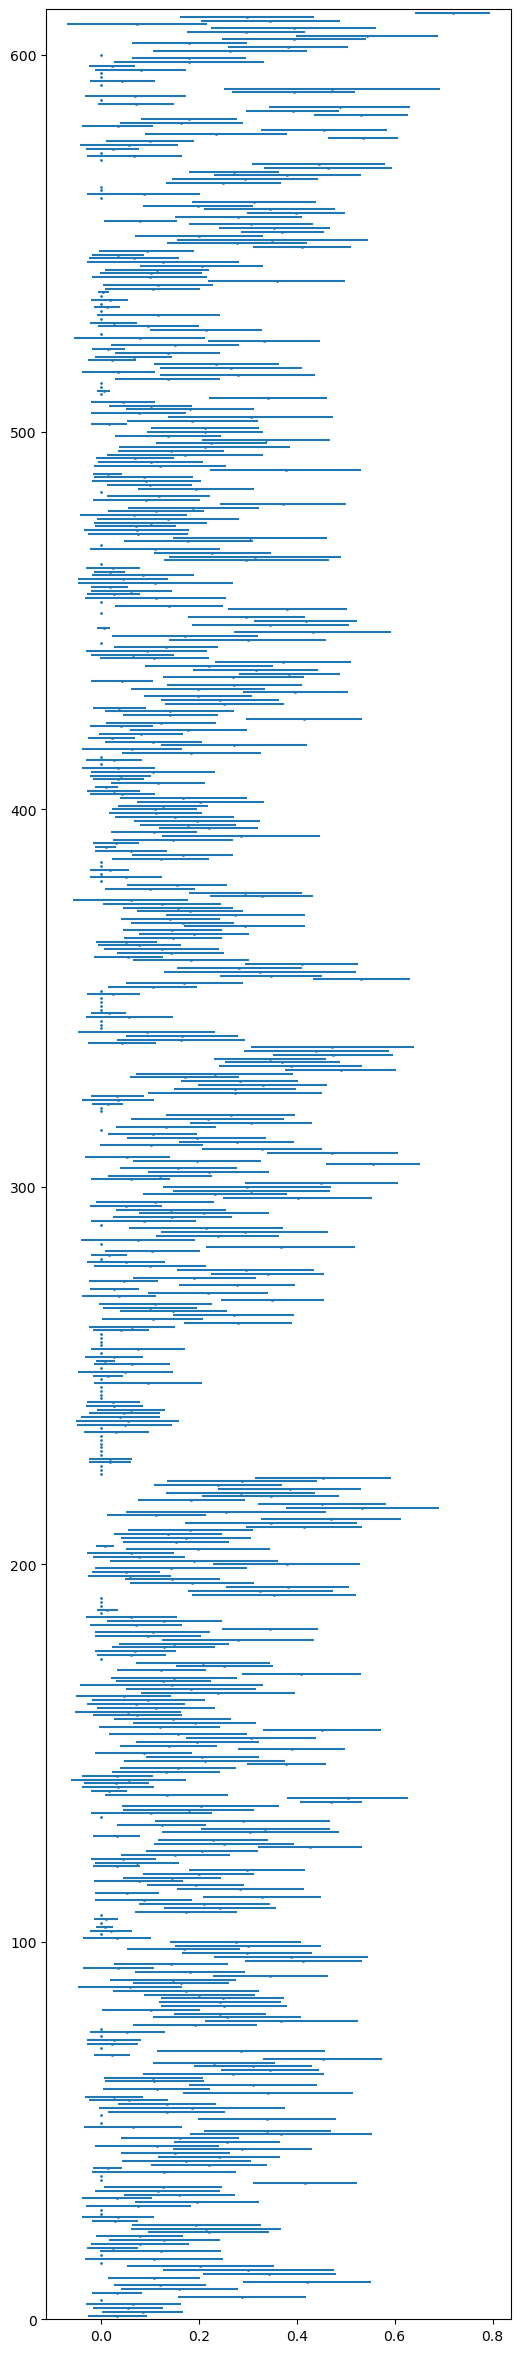

In [63]:
plt.figure(figsize=(6,30))
n_clust = df.shape[0]
plt.scatter(data=df[:n_clust], x='mpi', y='clust_no', s=1)
plt.hlines(data=df[:n_clust],
           y='clust_no', xmin='mpi_lo95CI', xmax='mpi_up95CI')
plt.ylim(0, n_clust+1)

##### provincial SE & CI

In [67]:
path = datafd_path / 'excels' / 'Table-5-Subnational-Results-MPI-2021-eda.xlsx'
rgn_df = pd.read_excel(path, sheet_name='mpi_khm_dhs14_rgn_CI')

In [87]:
rgn_df

,region_name,mpi,mpi_SE,mpi_lo95CI,mpi_up95CI
0,Banteay Meanchay,0.137199,0.019363,0.099167,0.175231
1,Battambang & Pailin,0.114760,0.021137,0.073245,0.156276
2,Kampong Cham,0.195211,0.022676,0.150673,0.239749
3,Kampong Chhnang,0.224071,0.020997,0.182830,0.265311
4,Kampong Speu,0.187270,0.022155,0.143755,0.230785
5,Kampong Thom,0.216589,0.024835,0.167811,0.265367
6,Kampot & Kep,0.169327,0.019605,0.130821,0.207833
7,Kandal,0.144739,0.019114,0.107196,0.182282
8,Kratie,0.300186,0.030758,0.239774,0.360598
9,Mondul Kiri and Ratanak Kiri,0.290033,0.040022,0.211426,0.368640


(-0.1, 0.85)

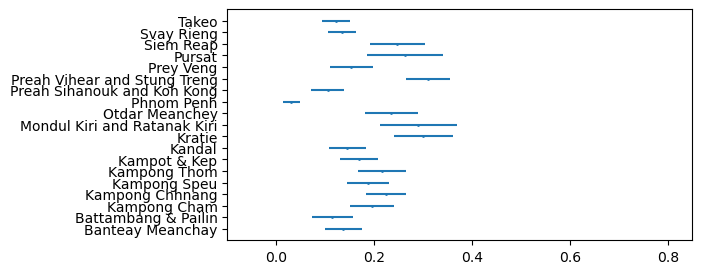

In [86]:
plt.figure(figsize=(6,3))
n_clust = rgn_df.shape[0]
plt.scatter(data=rgn_df[:n_clust], x='mpi', y='region_name', s=1)
plt.hlines(data=rgn_df[:n_clust],
           y='region_name', xmin='mpi_lo95CI', xmax='mpi_up95CI')
plt.ylim(0-1, n_clust)
plt.xlim(-0.1, 0.85)

### cluster-level MPI based on Cambodia DHS 2014

In [3]:
spatial_res = 'clust'
mpi_df = pd.read_csv(outfd_path / 'data' / f'mpi_khm_dhs14_{spatial_res}.csv')

In [4]:
mpi_df.shape

(611, 2)

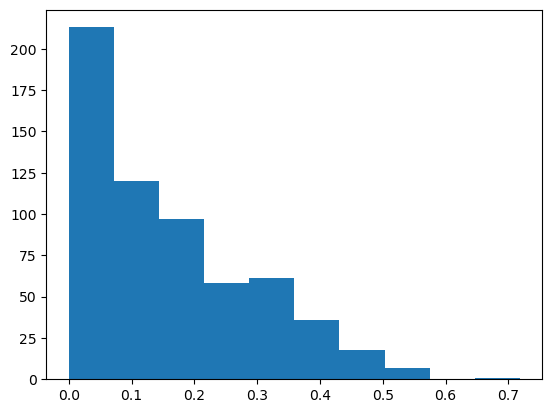

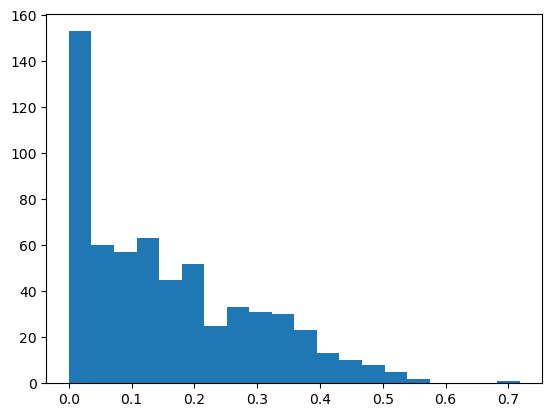

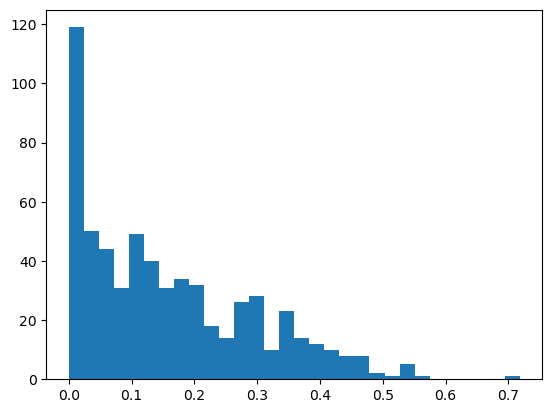

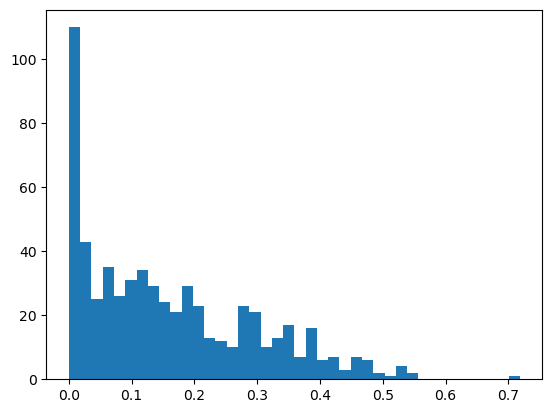

In [12]:
for n_bin in [10, 20, 30, 40]:
    plt.figure()
    plt.hist(mpi_df.mpi, bins=n_bin);

#### 0 MPI

In [8]:
mpi_df.loc[mpi_df.mpi == 0, :]  # 86 clusters have 0 MPI

,clust_no,mpi
4,5,0.0
14,15,0.0
16,17,0.0
27,28,0.0
28,29,0.0
...,...,...
587,588,0.0
591,592,0.0
593,594,0.0
594,595,0.0


In [20]:
mpi0_clusters = mpi_df.loc[mpi_df.mpi == 0, 'clust_no']
mpi0_clusters

4        5
14      15
16      17
27      28
28      29
      ... 
587    588
591    592
593    594
594    595
599    600
Name: clust_no, Length: 86, dtype: int64

##### inspect 1 cluster

In [9]:
i = 5
clust5_mpi_df = pd.read_stata(
    datafd_path / 'dta' / f'khm_dhs14_mpi_{spatial_res}{i}.dta')
clust5_mpi_df.head(2)

,hh_id,ind_id,psu,strata,subsample,weight,area,region,region_01,agec4,...,g01_k_elec_1,g01_k_toilet_1,g01_k_water_1,g01_k_house_1,g01_k_fuel_1,g01_k_asset_1,MPI_1_20,MPI_1_33,MPI_1_50,MPI_1
0,50002,5000201,5,banteay meanchey - urban,selected,0.209528,urban,Banteay Meanchay,Banteay Meanchay,18-59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.080808,0.0,0.0,0.0
1,50002,5000202,5,banteay meanchey - urban,selected,0.209528,urban,Banteay Meanchay,Banteay Meanchay,18-59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.080808,0.0,0.0,0.0


In [12]:
clust5_mpi_df.columns.to_list()

['hh_id',
 'ind_id',
 'psu',
 'strata',
 'subsample',
 'weight',
 'area',
 'region',
 'region_01',
 'agec4',
 'agec2',
 'headship',
 'd_cm',
 'd_nutr',
 'd_satt',
 'd_educ',
 'd_elct',
 'd_wtr',
 'd_sani',
 'd_hsg',
 'd_ckfl',
 'd_asst',
 'd_cm_01',
 'd_nutr_01',
 'd_satt_01',
 'd_educ_01',
 'd_elct_01',
 'd_wtr_01',
 'd_sani_01',
 'd_hsg_01',
 'd_ckfl_01',
 'd_asst_01',
 'clust_no',
 'edu_1',
 'atten_1',
 'cm_1',
 'nutri_1',
 'elec_1',
 'toilet_1',
 'water_1',
 'house_1',
 'fuel_1',
 'asset_1',
 'sample_1',
 'per_sample_weighted_1',
 'per_sample_1',
 'g01_edu_1',
 'g01_atten_1',
 'g01_cm_1',
 'g01_nutri_1',
 'g01_elec_1',
 'g01_toilet_1',
 'g01_water_1',
 'g01_house_1',
 'g01_fuel_1',
 'g01_asset_1',
 'raw1_edu_1',
 'raw1_atten_1',
 'raw1_cm_1',
 'raw1_nutri_1',
 'raw1_elec_1',
 'raw1_toilet_1',
 'raw1_water_1',
 'raw1_house_1',
 'raw1_fuel_1',
 'raw1_asset_1',
 'w1_edu_1',
 'w1_atten_1',
 'w1_cm_1',
 'w1_nutri_1',
 'w1_elec_1',
 'w1_toilet_1',
 'w1_water_1',
 'w1_house_1',
 'w1_fuel_

In [13]:
clust5_mpi_df.shape

(66, 107)

In [14]:
clust5_mpi_df.sample_1.mean()

1.0

In [16]:
clust5_mpi_df.weight.unique()

array([0.209528])

In [18]:
clust5_mpi_df.c_vector_1.value_counts()  # no one is mpi poor

0.222222    24
0.055556    24
0.000000    18
Name: c_vector_1, dtype: int64

##### inspect all clusters

In [31]:
# check if MPI=0 simply b/c cluster has no poor ppl.
tocheck_clusters = []
for clust_no in mpi0_clusters:
    clust_mpi_df = pd.read_stata(
        datafd_path / 'dta' / 
        f'khm_dhs14_mpi_{spatial_res}{clust_no}.dta')
    mpi_k20 = clust_mpi_df.MPI_1_20.unique()
    assert len(mpi_k20) == 1
    mpi_k20 = mpi_k20[0]
    if mpi_k20 > 0:  # MPI=0 b/c cluster has no poor ppl.
        pass
    else:  # TO CHECK: clusters have 0 mpi_k20
        # all ppl. have score < 20?
        print(f'{clust_no}: {mpi_k20}')
        tocheck_clusters.append(clust_no)

15: 0.0
72: 0.0
224: 0.0
226: 0.0
229: 0.0
230: 0.0
231: 0.0
232: 0.0
233: 0.0
236: 0.0
245: 0.0
247: 0.0
350: 0.0
381: 0.0
484: 0.0
564: 0.0
592: 0.0


In [48]:
# check clusters that have 0 mpi_k20:
# all/some ppl. used to calc. MPI, MPI=0 b/c none is poor
for clust_no in tocheck_clusters:
    clust_mpi_df = pd.read_stata(
        datafd_path / 'dta' / 
        f'khm_dhs14_mpi_{spatial_res}{clust_no}.dta')
    print(clust_no)
    print(clust_mpi_df.shape[0])  # total no. of ppl.
    display(clust_mpi_df[['sample_1',  # in subsample (used)
                          'per_sample_weighted_1',  # % no missing
                          'per_sample_1',  # % no missing
                          'c_vector_1']].describe())  # score
    print()


15
81


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,81.0,81.0,81.0,81.000000
mean,1.0,1.0,1.0,0.070645
std,0.0,0.0,0.0,0.066905
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.055556
75%,1.0,1.0,1.0,0.166667
max,1.0,1.0,1.0,0.166667



72
57


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,57.000000,5.700000e+01,5.700000e+01,53.000000
mean,0.929825,9.298248e-01,9.298248e-01,0.013627
std,0.257713,1.804034e-07,1.804034e-07,0.024132
min,0.000000,9.298246e-01,9.298246e-01,0.000000
25%,1.000000,9.298246e-01,9.298246e-01,0.000000
50%,1.000000,9.298246e-01,9.298246e-01,0.000000
75%,1.000000,9.298246e-01,9.298246e-01,0.000000
max,1.000000,9.298246e-01,9.298246e-01,0.055556



224
60


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,60.0,60.0,60.0,60.000000
mean,1.0,1.0,1.0,0.002778
std,0.0,0.0,0.0,0.012210
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.000000
75%,1.0,1.0,1.0,0.000000
max,1.0,1.0,1.0,0.055556



226
52


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,52.000000,5.200000e+01,5.200000e+01,46.000000
mean,0.884615,8.846156e-01,8.846156e-01,0.030193
std,0.322603,2.407447e-07,2.407447e-07,0.060526
min,0.000000,8.846154e-01,8.846154e-01,0.000000
25%,1.000000,8.846154e-01,8.846154e-01,0.000000
50%,1.000000,8.846154e-01,8.846154e-01,0.000000
75%,1.000000,8.846154e-01,8.846154e-01,0.000000
max,1.000000,8.846154e-01,8.846154e-01,0.166667



229
80


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,80.000000,8.000000e+01,8.000000e+01,73.000000
mean,0.912500,9.124993e-01,9.124993e-01,0.026636
std,0.284349,7.197684e-07,7.197684e-07,0.057905
min,0.000000,9.125000e-01,9.125000e-01,0.000000
25%,1.000000,9.125000e-01,9.125000e-01,0.000000
50%,1.000000,9.125000e-01,9.125000e-01,0.000000
75%,1.000000,9.125000e-01,9.125000e-01,0.000000
max,1.000000,9.125000e-01,9.125000e-01,0.166667



230
62


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,62.000000,6.200000e+01,6.200000e+01,54.000000
mean,0.870968,8.709678e-01,8.709678e-01,0.053498
std,0.337972,6.009122e-08,6.009122e-08,0.073166
min,0.000000,8.709677e-01,8.709677e-01,0.000000
25%,1.000000,8.709677e-01,8.709677e-01,0.000000
50%,1.000000,8.709677e-01,8.709677e-01,0.000000
75%,1.000000,8.709677e-01,8.709677e-01,0.166667
max,1.000000,8.709677e-01,8.709677e-01,0.166667



231
102


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,102.000000,1.020000e+02,1.020000e+02,100.000000
mean,0.980392,9.803924e-01,9.803924e-01,0.036111
std,0.139333,2.395960e-07,2.395960e-07,0.065294
min,0.000000,9.803922e-01,9.803922e-01,0.000000
25%,1.000000,9.803922e-01,9.803922e-01,0.000000
50%,1.000000,9.803922e-01,9.803922e-01,0.000000
75%,1.000000,9.803922e-01,9.803922e-01,0.055556
max,1.000000,9.803922e-01,9.803922e-01,0.166667



232
62


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,62.000000,6.200000e+01,6.200000e+01,51.000000
mean,0.822581,8.225811e-01,8.225811e-01,0.031590
std,0.385142,4.807297e-07,4.807297e-07,0.061116
min,0.000000,8.225806e-01,8.225806e-01,0.000000
25%,1.000000,8.225806e-01,8.225806e-01,0.000000
50%,1.000000,8.225806e-01,8.225806e-01,0.000000
75%,1.000000,8.225806e-01,8.225806e-01,0.027778
max,1.000000,8.225806e-01,8.225806e-01,0.166667



233
67


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,67.000000,67.000000,67.000000,62.000000
mean,0.925373,0.925373,0.925373,0.052867
std,0.264771,0.000000,0.000000,0.070723
min,0.000000,0.925373,0.925373,0.000000
25%,1.000000,0.925373,0.925373,0.000000
50%,1.000000,0.925373,0.925373,0.000000
75%,1.000000,0.925373,0.925373,0.138889
max,1.000000,0.925373,0.925373,0.166667



236
91


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,91.0,91.0,91.0,91.000000
mean,1.0,1.0,1.0,0.063492
std,0.0,0.0,0.0,0.076610
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.000000
75%,1.0,1.0,1.0,0.166667
max,1.0,1.0,1.0,0.166667



245
82


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,82.0,82.0,82.0,82.000000
mean,1.0,1.0,1.0,0.067751
std,0.0,0.0,0.0,0.068195
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.055556
75%,1.0,1.0,1.0,0.166667
max,1.0,1.0,1.0,0.166667



247
71


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,71.000000,7.100000e+01,7.100000e+01,63.000000
mean,0.887324,8.873245e-01,8.873245e-01,0.089947
std,0.318447,5.402599e-07,5.402599e-07,0.067989
min,0.000000,8.873239e-01,8.873239e-01,0.000000
25%,1.000000,8.873239e-01,8.873239e-01,0.055556
50%,1.000000,8.873239e-01,8.873239e-01,0.055556
75%,1.000000,8.873239e-01,8.873239e-01,0.166667
max,1.000000,8.873239e-01,8.873239e-01,0.166667



350
70


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,70.0,70.0,70.0,70.000000
mean,1.0,1.0,1.0,0.025397
std,0.0,0.0,0.0,0.058829
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.000000
75%,1.0,1.0,1.0,0.000000
max,1.0,1.0,1.0,0.166667



381
58


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,58.0,58.0,58.0,58.000000
mean,1.0,1.0,1.0,0.075671
std,0.0,0.0,0.0,0.071871
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.055556
75%,1.0,1.0,1.0,0.166667
max,1.0,1.0,1.0,0.166667



484
71


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,71.0,71.0,71.0,71.000000
mean,1.0,1.0,1.0,0.043818
std,0.0,0.0,0.0,0.067007
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.000000
75%,1.0,1.0,1.0,0.055556
max,1.0,1.0,1.0,0.166667



564
75


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,75.0,75.0,75.0,75.000000
mean,1.0,1.0,1.0,0.057778
std,0.0,0.0,0.0,0.054372
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.055556
75%,1.0,1.0,1.0,0.111111
max,1.0,1.0,1.0,0.166667



592
75


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,75.0,75.0,75.0,75.000000
mean,1.0,1.0,1.0,0.044444
std,0.0,0.0,0.0,0.061268
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.000000
75%,1.0,1.0,1.0,0.055556
max,1.0,1.0,1.0,0.166667


#### missingness

In [43]:
# confirm that per_sample_1 is just percent rows with missing values
# yes for most clusters, check the rest in the next cell
tocheck_clusters = []

for clust_no in range(1, 611+1):
    df = pd.read_stata(
        datafd_path / 'dta' / 
        f'khm_dhs14_mpi_{spatial_res}{clust_no}.dta')
    assert df.subsample.unique() == ['selected']  # all in subsample
    assert len(df.per_sample_1.unique()) == 1
    assert all(df.per_sample_weighted_1 == df.per_sample_1)
    perc_nonmiss = df.per_sample_1.unique()[0]
    perc_miss = df.isna().any(axis=1).mean()
    try:
        assert abs(perc_miss + perc_nonmiss - 1) < 1e-4
    except:
        tocheck_clusters.append(clust_no)
    print(perc_miss)
    # display(clust_mpi_df.head(2))

0.14864864864864866
0.0
0.07692307692307693
0.1016949152542373
0.0
0.0
0.12903225806451613
0.03529411764705882
0.0
0.08
0.10126582278481013
0.0
0.0
0.0
0.0
0.05194805194805195
0.0
0.0
0.0
0.06493506493506493
0.0
0.0
0.0
0.13513513513513514
0.0
0.0
0.04285714285714286
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1509433962264151
0.0
0.0
0.0
0.0
0.0
0.07058823529411765
0.06557377049180328
0.0
0.1044776119402985
0.06818181818181818
0.0
0.0449438202247191
0.0
0.049019607843137254
0.0
0.06896551724137931
0.0
0.07936507936507936
0.0
0.04
0.07142857142857142
0.11666666666666667
0.08928571428571429
0.0
0.0
0.0
0.04395604395604396
0.0
0.0
0.0
0.056338028169014086
0.0
0.0
0.0
0.0
0.07017543859649122
0.0
0.0
0.0
0.0
0.09333333333333334
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.10344827586206896
0.056338028169014086
0.0
0.0
0.0
0.0
0.0
0.047619047619047616
0.0
0.0
0.1044776119402985
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.036585365853658534
0.0
0.0
0.07407407407407407
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.025


In [63]:
# turns out per_sample_1 is percent rows with missing values in 
# c_censured_vector_1_33
for clust_no in tocheck_clusters:
    df = pd.read_stata(
        datafd_path / 'dta' / 
        f'khm_dhs14_mpi_{spatial_res}{clust_no}.dta')
    perc_nonmiss = df.per_sample_1.unique()[0]
    # perc_miss = df.isna().any(axis=1).mean()
    perc_miss = df.c_censured_vector_1_33.isna().mean()
    # this perc_miss + perc_nonmiss is 1, so there are missing values
    # in other columns than c_censured_vector_1_33
    print(perc_nonmiss, perc_miss)
    print(perc_nonmiss + perc_miss)
    print()

0.9431818 0.056818181818181816
0.9999999945813959

1.0 0.0
1.0

0.8452381 0.15476190476190477
0.9999999943233672

1.0 0.0
1.0

1.0 0.0
1.0



In [64]:
# df_row_w_na = df[df.isna().any(axis=1)]
# col_w_na = df_row_w_na.isna().any(axis=0)
# df_row_w_na.loc[:, col_w_na]

In [69]:
tocheck_clusters

[46, 227, 308, 348, 353]